In [98]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Loading necessary libraries

In [99]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data set

In [100]:
#Importing train, test dataset
train_data = pd.read_csv('/Users/abishek/Downloads/big-mart-sales-prediction/Train.csv')
test_data = pd.read_csv('/Users/abishek/Downloads/big-mart-sales-prediction/Test.csv')

#Add a source column to split data after EDA:
train_data['source']='train_data'
test_data['source']='test_data'


# EDA

In [101]:
#Combine train & test data 
combined_data = pd.concat([train_data, test_data],ignore_index=True,sort=False)
print (train_data.shape)
print (test_data.shape)
print (combined_data.shape)
combined_data.head(5)

#Train dataset has 8523 records and 12 columns(7 categorical,5 numerical)
#Test dataset has 5681 records and 11 columns(7 categorical,4 numberical)
#Combined dataset has 14204 records and 12 columns

(8523, 13)
(5681, 12)
(14204, 13)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train_data
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data


In [102]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  11765 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
source                       14204 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 1.4+ MB


In [103]:
##checking for missing values in train,test and combined datasets:
combined_data.isnull().sum()
#Missing/NaN values are present for 2 variables
# Item_Weight =2439
# Outlet_Size =4016
#The initial analysis suggests that we need to consider imputing the missing data for the variables Item_Weight,Outlet_size.

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [104]:
#Understanding the summary of numerical variables:
combined_data.describe()
#Mean value for the "Item_Weight" is 12.79
#some values for Item_Visibility is 0 which implies product is sold without visibility and can be infered as non-sensical
#variable.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a8e4630>,
      dtype=object)

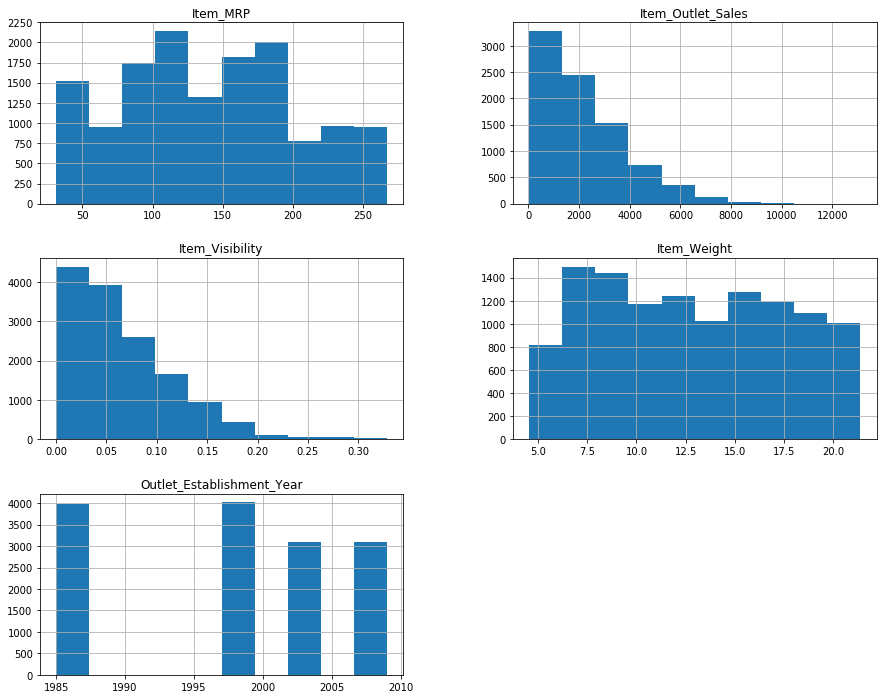

In [45]:
#added new
combined_data.hist(figsize=(15,12))

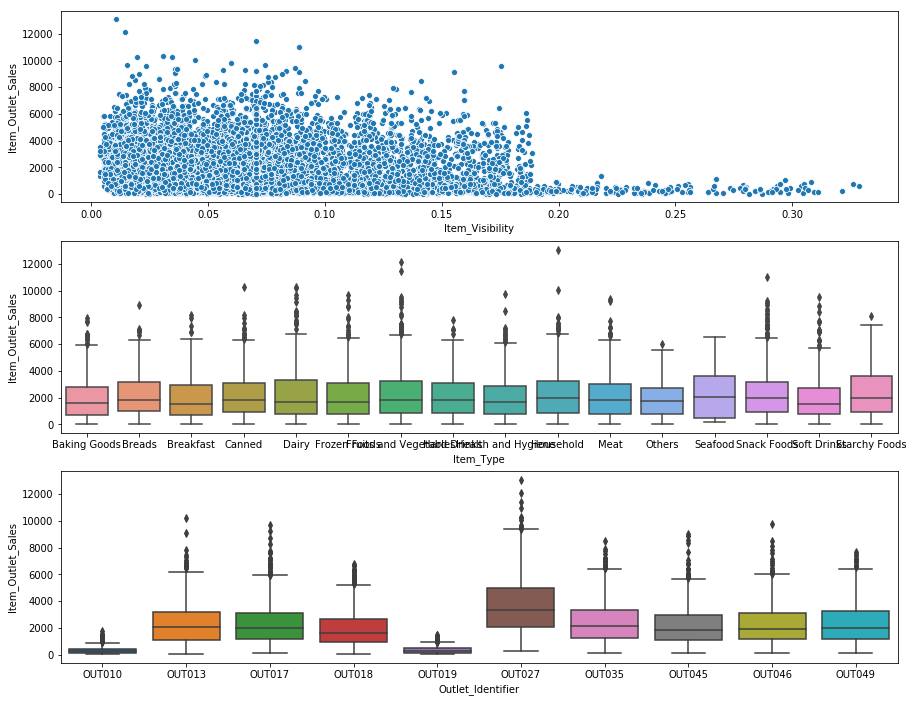

In [76]:
#added new
fig,axes=plt.subplots(3,1,figsize=(15,12))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',ax=axes[0],data=combined_data)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=combined_data)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=combined_data)

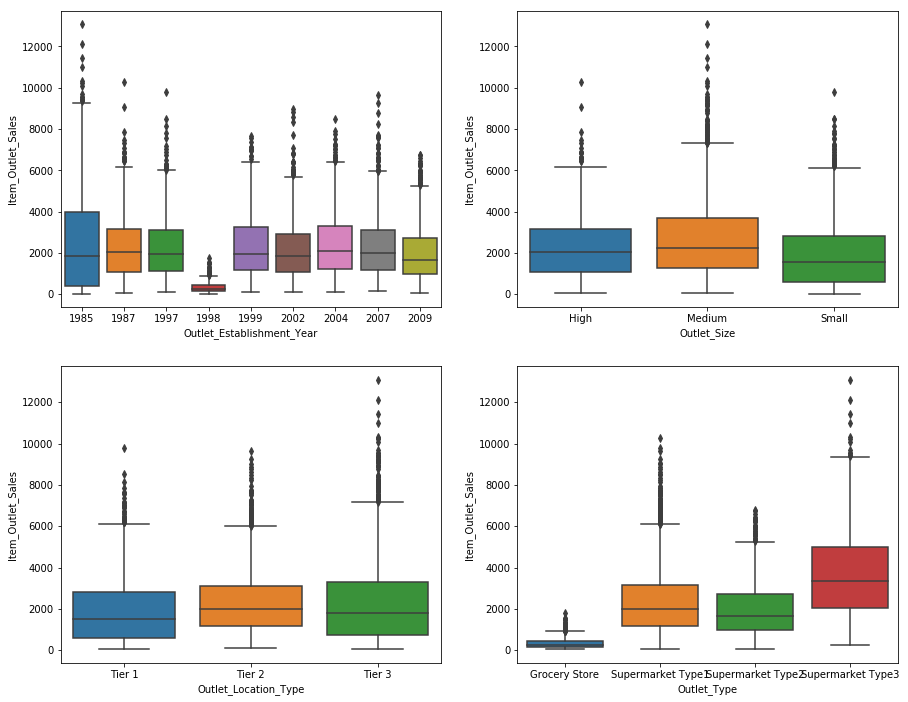

In [75]:
#added new 
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=combined_data)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=combined_data)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=combined_data)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=combined_data)

<Figure size 432x288 with 0 Axes>

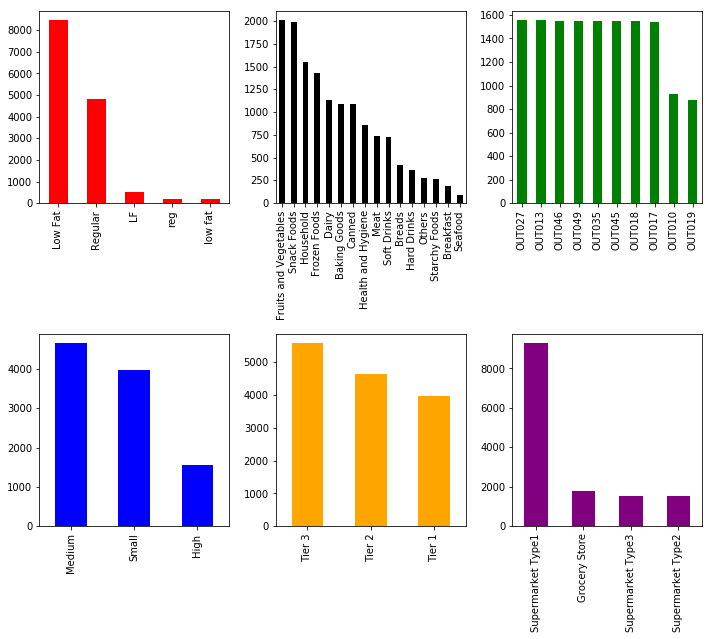

In [105]:
#Visual exploration of categorical variables from combined dataset:
plt.figure()
plt.subplot(3,3,1)
combined_data["Item_Fat_Content"].value_counts().plot(figsize=(10,12),kind='bar',color='red')

plt.subplot(3,3,2)
combined_data["Item_Type"].value_counts().plot(figsize=(10,12),kind='bar',color='black')

plt.subplot(3,3,3)
combined_data["Outlet_Identifier"].value_counts().plot(figsize=(10,12),kind='bar',color='green')

plt.subplot(3,3,4)
combined_data["Outlet_Size"].value_counts().plot(figsize=(10,12),kind='bar',color='blue')

plt.subplot(3,3,5)
combined_data["Outlet_Location_Type"].value_counts().plot(figsize=(10,12),kind='bar',color='orange')

plt.subplot(3,3,6)
combined_data["Outlet_Type"].value_counts().plot(figsize=(10,12),kind='bar',color='purple')


plt.tight_layout()
plt.show()
#Key takeaways from the visualization: 
#1.Item_Fat_Content has multiple representations but, logically it has only 2 values(Low_Fat,Regular).
#2.There seems to be lot of Item_Type varieties, we can consider grouping them into 3 subgroups(Item_identifier) Food,Drink
# and Non-Consumable goods
#3.Medium-sized outlets has the most in terms out of outlet_size.
#4.Supermarket Type1 has the most stores in terms out of outlet_type.

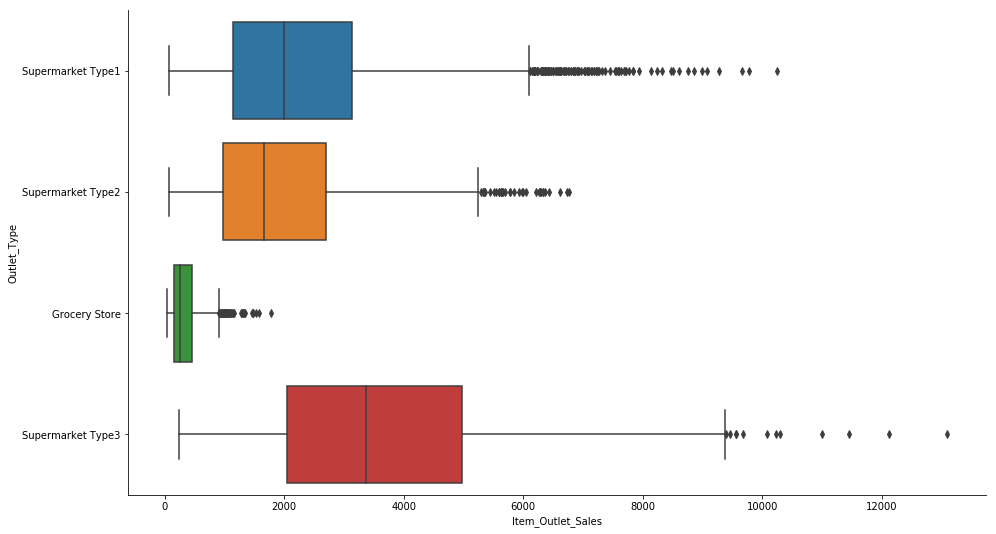

In [106]:
# Effect of Outlet Type on Outlet_Sales
x=sns.catplot(y='Outlet_Type',x='Item_Outlet_Sales',data=combined_data,kind="box")
x.fig.set_size_inches(20,8)
##Grocery Store has the least contribution in terms of outlet sales- which is logical as supermarkets perform better in general.
#Supermarket 1 type has better outlet sales distribution when compared to supermarket2 and supermarket3

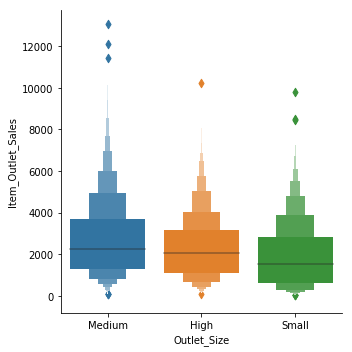

In [48]:
#Effect of Outlet_Size on Outlet_Sales
sns.catplot(x='Outlet_Size', y='Item_Outlet_Sales',data=combined_data,kind="boxen")
##Medium Sized store seems to be outperforming High sized store.

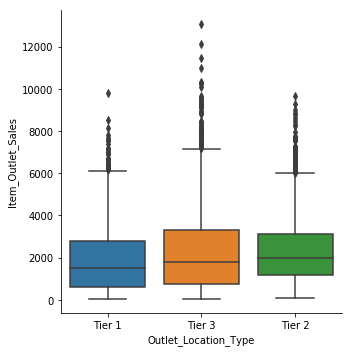

In [49]:
## Effect of Outlet Location on Outlet_Sales
sns.catplot(x='Outlet_Location_Type', y='Item_Outlet_Sales',data=combined_data,kind="box")
##From the plot, it is evident that Tier 3 has better outlet_sales.

# Imputing Missing Values

# Imputation of Item Fat_Content

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

 Post data fix:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


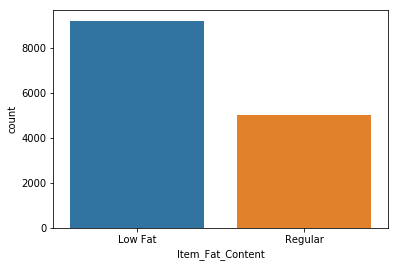

In [107]:
print(combined_data["Item_Fat_Content"].value_counts())
combined_data['Item_Fat_Content'] = combined_data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
print("\n Post data fix:")
print (combined_data['Item_Fat_Content'].value_counts())
sns.countplot(x = "Item_Fat_Content", data = combined_data )

#Post data fix, we have only 2 values for Item_Fat_Content: Low Fat and Regular. 

# Imputation of Item_Weight

In [108]:
item_weight_na = combined_data[combined_data['Item_Weight'].isna()]
item_weight_na['Outlet_Identifier'].unique()
item_weight_na['Outlet_Establishment_Year'].unique()

item_weight= combined_data.pivot_table(values='Item_Weight', index='Item_Identifier')
item_weight_new= combined_data['Item_Weight'].isnull()

combined_data.loc[item_weight_new,'Item_Weight']  = combined_data.loc[item_weight_new,'Item_Identifier'].apply(lambda z: item_weight.at[z,'Item_Weight'])
combined_data.head(5)



#After keen observation of the dataset, Item_weight was missing for Outlets OUT019,OUT027
#These Stores were established way back in 1985.
#All other stores have item_weight for the respective item_identifiers.Hence,Missing item_weight values were matched 
#with their respective item_identifiers.

array(['OUT027', 'OUT019'], dtype=object)

array([1985])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train_data
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data


# Imputation of Item_visibility

In [109]:
#Converting 0's to NaN to find mean value of Item_visibility before imputing Item_Visibility with Mean value:

print(combined_data["Item_Visibility"].value_counts())
combined_data.loc[combined_data['Item_Visibility'] == 0,'Item_Visibility'] = np.nan

for col in combined_data:
    val=combined_data[col].isnull().sum()
    if val>0:
        print("Number of missing values in ",col,"(combined_data):",val)

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
0.076975      3
0.077011      3
0.076792      3
0.076483      3
0.046899      2
0.159844      2
0.135708      2
0.135944      2
0.072298      2
0.136008      2
0.136896      2
0.203401      2
0.081788      2
0.075049      2
0.058369      2
0.104784      2
0.080131      2
0.072411      2
0.024635      2
0.052069      2
0.079968      2
0.179192      2
0.079806      2
0.121767      2
0.080625      2
           ... 
0.013147      1
0.098790      1
0.073397      1
0.137756      1
0.017937      1
0.105126      1
0.044156      1
0.141639      1
0.094411      1
0.074883      1
0.039236      1
0.044497      1
0.051147      1
0.175061      1
0.039034      1
0.077508      1
0.078943      1
0.077170      1
0.042959      1
0.013173      1
0.069939      1
0.011305      1
0.069042      1
0.012216      1
0.064142      1
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, L

In [110]:
#Imputing Item_visibilty with mean value:
combined_data['Item_Visibility'] = combined_data['Item_Visibility'].fillna((combined_data['Item_Visibility'].mean()))
combined_data.head(5)

#Item's which had visibility value to be 0 has been imputed with mean visibility value.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data
3,FDX07,19.20,Regular,0.070303,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train_data
4,NCD19,8.93,Low Fat,0.070303,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data


# Imputation of Outlet_size

In [111]:
#Further analysis on Outlet_size prior to data imputation:
combined_data['Outlet_Size'].count()
combined_data['Outlet_Size'].isna().sum()
data_outlet_na = combined_data[combined_data['Outlet_Size'].isna()]

data_outlet_na['Outlet_Identifier'].value_counts()
combined_data['Outlet_Identifier'].value_counts()
# 4016 Outlets are missing outlet_size data.
# Outlets - "OUT045", "OUT017" and "OUT010" account for all the missing outlet_size.

10188

4016

OUT045    1548
OUT017    1543
OUT010     925
Name: Outlet_Identifier, dtype: int64

OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

# Feature Engineering

# Creating Item_Category

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_category, dtype: int64

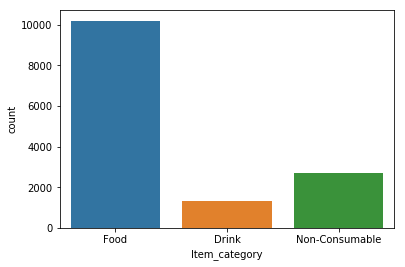

In [112]:
#Creating Item_category variable by grouping into Item_identifier into 3 generic categories:

combined_data['Item_category'] = combined_data['Item_Identifier'].apply(lambda x: x[0:2])
combined_data['Item_category'] = combined_data['Item_category'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drink'})
combined_data['Item_category'].value_counts()
sns.countplot(x = "Item_category", data = combined_data )



Low Fat    6499
Regular    5019
No Fat     2686
Name: Item_Fat_Content, dtype: int64

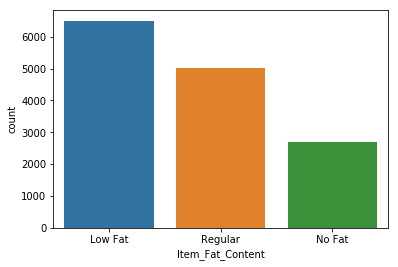

In [113]:

# After  dividing the items in to item category, we can find that category "Non consumable" will have no fats hence 
# adding a level to Item_Fat_Content as "No Fats" 

combined_data.loc[combined_data['Item_category']=='Non-Consumable','Item_Fat_Content']='No Fat'
combined_data['Item_Fat_Content'].value_counts()
sns.countplot(x = "Item_Fat_Content", data = combined_data )


# Creating Outlet years of operation

In [114]:
# determining the Outlet years of operation
#Since the Outlet sales data is for the Year 2013
combined_data['Outlet_Years'] = 2013 - combined_data['Outlet_Establishment_Year']

# checking the value counts again for outlet years
combined_data['Outlet_Years'].value_counts()

28    2439
26    1553
14    1550
9     1550
16    1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_Years, dtype: int64

# Checing for correlation with our numeric Data

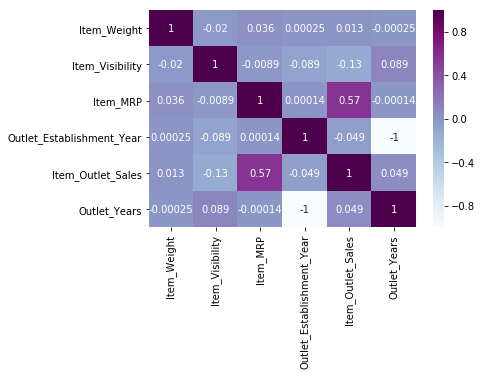

In [115]:
#Check for correlation between numerical variables - train data
sns.heatmap(combined_data.corr(),annot=True,cmap="BuPu")
plt.show()

#Item_Outlet_Sales and Item_MRP have strong  positive correlation.
##from this we can say ITEM_VISIBILiTY and ITEM_WEIGHT can be dropped.

In [116]:
combined_data.head()
combined_data.info()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_category,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_data,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_data,Drink,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_data,Food,14
3,FDX07,19.20,Regular,0.070303,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train_data,Food,15
4,NCD19,8.93,No Fat,0.070303,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_data,Non-Consumable,26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 15 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null int64
Outlet_Size                  10188 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
source                       14204 non-null object
Item_category                14204 non-null object
Outlet_Years                 14204 non-null int64
dtypes: float64(4), int64(2), object(9)
memory usage: 1.6+ MB


In [128]:
# removing unnecassary columns from the dataset

#combined_data = combined_data.drop('Item_Identifier', axis = 1)
#combined_data = combined_data.drop('source', axis = 1)
#combined_data = combined_data.drop('Item_Visibility', axis = 1)
#combined_data = combined_data.drop('Item_Weight', axis = 1)
combined_data = combined_data.drop('Item_Fat_Content', axis = 1)

#getting the new shape of the dataset
combined_data.shape

(14204, 10)

In [118]:
#Converting Data Type
combined_data.Item_Fat_Content=combined_data.Item_Fat_Content.astype('category')
combined_data.Item_Type=combined_data.Item_Type.astype('category')
combined_data.Outlet_Identifier=combined_data.Outlet_Identifier.astype('category')
combined_data.Outlet_Type=combined_data.Outlet_Type.astype('category')
combined_data.Outlet_Location_Type=combined_data.Outlet_Location_Type.astype('category')
combined_data.Outlet_Size=combined_data.Outlet_Size.astype('category')

combined_data.Outlet_Establishment_Year=combined_data.Outlet_Establishment_Year.astype('category')
combined_data.Item_category=combined_data.Item_category.astype('category')


combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 11 columns):
Item_Fat_Content             14204 non-null category
Item_Type                    14204 non-null category
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null category
Outlet_Establishment_Year    14204 non-null category
Outlet_Size                  10188 non-null category
Outlet_Location_Type         14204 non-null category
Outlet_Type                  14204 non-null category
Item_Outlet_Sales            8523 non-null float64
Item_category                14204 non-null category
Outlet_Years                 14204 non-null int64
dtypes: category(8), float64(2), int64(1)
memory usage: 446.1 KB


In [119]:
data_label = combined_data.Item_Outlet_Sales
data_dummy = pd.get_dummies(combined_data)

In [121]:
data_dummy.shape

(14204, 54)